# Tokenizers

Tokenizers serve one purpose: Translate text into numerical data that can be processed by the model

The goal is to find the most meaningful representation, the one that makes the most sense to the model. And, if possible, the smallest repesentation

## Word-based tokenization algorithms

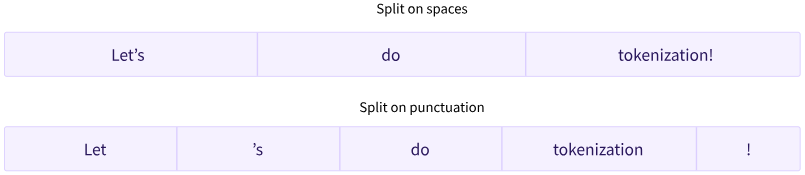

We can end up with some pretty large vocabularies where a vocabulary is defined by the total number of independent tokens that we have in our corpus
- Each word gets assigned an ID, starting from 0 and going up to the size of the vocabulary. The model uses these IDs to identify each word
- If we want to completely cover a language with a word-based tokenizer, we’ll need to have an identifier for each word in the language, which will generate a huge amount of tokens. Build a map from each word to an input ID

Some downsides: words like "dog" are represented differently from words like “dogs”, and the model will initially have no way of knowing that “dog” and “dogs” are similar: it will identify the two words as unrelated. The same applies to other similar words, like “run” and “running”, which the model will not see as being similar initially.

```Unknown token```: Custom token to represent words that are not in our vocabulary, ```[UNK]```/```<unk>```

The goal when crafting the vocabulary is to do it in such a way that the tokenizer tokenizes as few words as possible into the unknown token. One way to reduce the amount of unknown tokens is to go one level deeper, using a character-based tokenizer

## Character-based tokenization algorithms

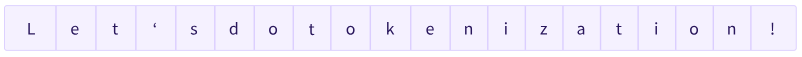

2 primary benefits:
- Smaller vocab
- Much fewer out-of-vocabulary (unknown) tokens since every word can be built from characters

Downsides
- Since the representation is now based on characters rather than words, one could argue that, intuitively, it’s less meaningful. Each character doesn't mean a lot on its own
- There will be a large amount of tokens to be processed by our model because a word is split into characters

To get the best of both worlds, we can use a third technique that combines the two approaches: subword tokenization.

## Subword tokenization

Principle:

1. Frequently used words should not be split into smaller subwords
2. Rare words should be decomposed into meaningful subwords

Example 1:

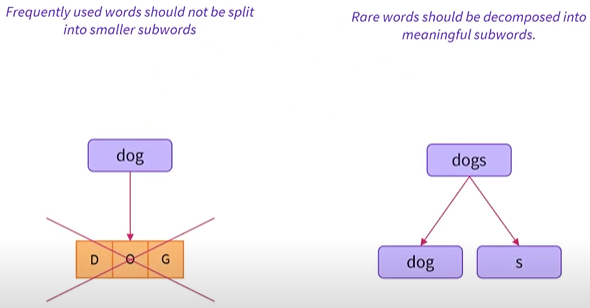

When encountering the word 'dogs' we would like our tokenizer to understand that at the root, this is still the word 'dog' with an added 's' that slightly changes the meaning while keeping the original idea

Example 2:

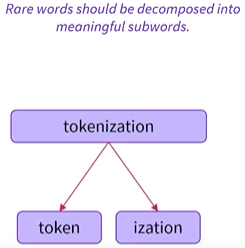

The root of the word is 'token' (labeled as start of the word) and 'ization' (labeled as additional information/completion of the word) completes the root to give it a slightly different meaning

Subwords help identify similar syntactic or semantic situations in text. They provide a lot of semantic meaning

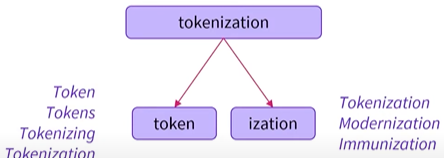

It can make sense of 'token' in different situations. It can understand that 'token', 'tokens', 'tokenizing', 'tokenizations' are linked and have a similar meaning

It can understand that 'tokenization', 'modernization', 'immunization' which the same suffixes are probably used in the same syntactic situations 

Subword-based tokenizers generally have a way to identify whch tokens are a start of word and which tokens complete start of words/completiton of words

## Loading and Saving

```from_pretrained()``` and ```save_pretrained()```

These methods will load or save the 
- algorithm used by the tokenizer (a bit like the architecture of the model) as well as its 
- vocabulary (a bit like the weights of the model)

In [1]:
"""
Loading the BERT tokenizer, trained with the same checkpoint as BERT,
is done the same way as loading the model, except we use the BertTokenizer class:
"""

#from transformers import BertTokenizer
#tokenizer = BertTokenizer.from_pretrained("bert-base-cased")


"""
Similar to AutoModel, the AutoTokenizer class will grab the proper tokenizer class in the 
library based on the checkpoint name, and can be used directly with any checkpoint:
"""

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer("Using a Transformer network is simple")

# tokenizer.save_pretrained("directory_on_my_computer")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

c:\Users\User\miniconda3\envs\myenv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

c:\Users\User\miniconda3\envs\myenv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

## Encoding

Encoding is the process of translating text into numbers. It is a 2-step process:
1. Tokenization
2. Conversion to Input IDs

Tokenization: Split the text into tokens (words, parts of words, punctuation symbols etc). There are multiple rules that can be used to govern this process, which is why we need to instantiate the tokenizer using the name of the model to make sure we use the same rules that were used when the model was pretrained

Conversion to Input IDs, convert tokens into numbers: We build a tensor out of the tokens and feed them to the model. The tokenizer has a vocabulary which is the part we download when we instantiate it with the ```from_pretrained``` method (we need to use the same vocabulary used when the model was pretrained, make sure we use the same mapping). Converts each token to their unique respective ID as defined by the tokenizer's vocabulary 

For demonstration purposes, we will explore both steps separately. But in practice we should call the tokenizer directly on the inputs

Tokenization Pipeline:

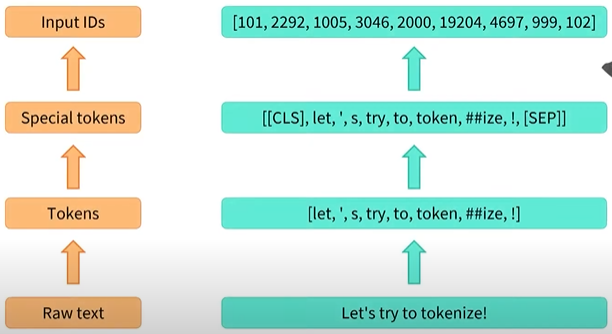



### Tokenization

In [2]:
from transformers import AutoTokenizer

"""
This tokenizer is a subword tokenizer
It splits the words until it obtains tokens that can be represented by its vocabulary

The tokenizer may first perform some operaitons like lowercasing all words then
follow a set of rules to split the result into small chunks of text

Most Transformers use a subword tokenization algorithm 

##former -> convention by BERT to indicate that this is not the beginning of the word
"""
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

# Output is a list of strings/tokens
print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


### Tokens to Input IDs

In [3]:
"""
The conversion to input IDs is handled by the convert_tokens_to_ids() tokenizer method
"""

ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

"""
These outputs, once converted to the appropriate framework tensor,  (torch.tensor(encoded_sequences))
can then be used as inputs to a model as seen earlier in this chapter.
"""

[7993, 170, 13809, 23763, 2443, 1110, 3014]


### Decoding

Decoding: From vocabulary indicies, we want to get a string

Note that the decode method not only converts the indices back to tokens, but also groups together the tokens that were part of the same words to produce a readable sentence. This behavior will be extremely useful when we use models that predict new text (either text generated from a prompt, or for sequence-to-sequence problems like translation or summarization).

In [4]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple
